In [38]:
#imports
import matplotlib.pyplot as plt
import numpy as np


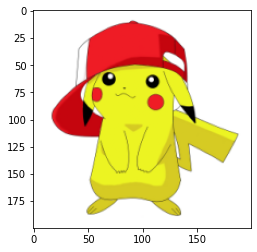

In [39]:
#image scanner
import matplotlib.image as mpimg

#loading 5 test images
img1 = mpimg.imread('DL1.png')
img2 = mpimg.imread('DL2.png')
img3 = mpimg.imread('DL3.jpeg')
img4 = mpimg.imread('DL4.png')
img5 = mpimg.imread('DL5.png')


#image output
plt.imshow(img1)
plt.show()

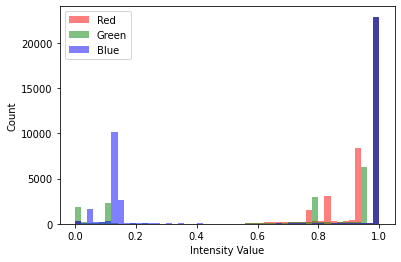

In [128]:
 #channel histograms of the image

#this makes it easy to switch
img = img1 

#the 3 different channels from the data
Red = img[:, :, 0]
Green = img[:, :, 1]
Blue = img[:, :, 2]

#put it on the same histogram
plt.hist(Red.ravel(), bins = 50, color = 'Red',alpha=0.5 )
plt.hist(Green.ravel(), bins = 50, color = 'Green', alpha = 0.5)
plt.hist(Blue.ravel(), bins = 50, color = 'Blue', alpha = 0.5)

plt.xlabel('Intensity Value')
plt.ylabel('Count')
plt.legend([ 'Red', 'Green', 'Blue'])
plt.show()

In [41]:
#mean and deviation for standardization
def standardize(data):
    data_mean= np.mean(data)
    data_std=np.std(data)
    data= (data-data_mean)/data_std
    return data

#print and examine data
red_mean= np.mean(Red)
green_mean= np.mean(Green)
blue_mean= np.mean(Blue)

print("RGB means:")
print([red_mean,green_mean,blue_mean],end='\n\n')

red_std= np.std(Red)
green_std= np.std(Green)
blue_std= np.std(Blue)

print("RGB standard deviation:")
print([red_std,green_std,blue_std],end='\n\n')


#standardize all channels separetly
Red= standardize(Red)
Green= standardize(Green)
Blue= standardize(Blue)

#mean is almost null,standard deviation 1, the data is normalized
print("Átlag és szótás érték:")
print(Green.mean(),Green.std(),end='\n\n')



Átlag és szótás érték:
4.8828124e-08 1.0



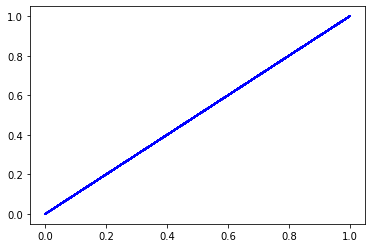

In [144]:
#Standardized plot of blue values
plt.plot(Blue,Blue, color='blue')
plt.show()

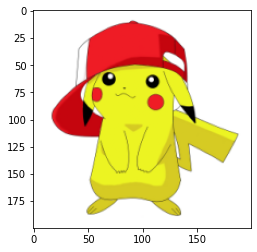

In [44]:
# standardized image
plt.imshow(img)
plt.show()

In [114]:
#import the needed libs for sound manipulation

import scipy.io.wavfile as wav
import scipy.signal as signal
from matplotlib import colors
import soundfile as sf

#pip install soundfile

In [122]:
#plot the sound file waveform
def waveGraph(data):
    plt.plot(data[0:])
    plt.ylabel("Amplitude")
    plt.xlabel("Time")
    plt.title("Dog sound waveform")
    plt.show()
    
#spectogram of the soundfile data    
def spectogram(data, samplerate):
    pxx, freqs, bins, im = plt.specgram(data,256,samplerate)
    plt.ylabel('Frequency [Hz]')
    plt.title("Dog sound spectogram")
    plt.xlabel('Time [sec]')
    plt.show()


Mean:  -2.1569488182814795e-06
Standard deviation:  0.20370338556338


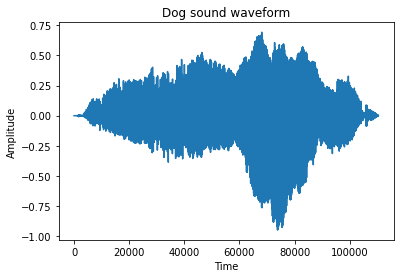

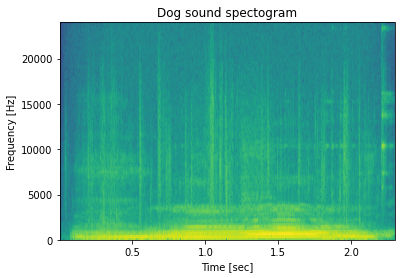

In [127]:
#read the audio file, produce mean and standard deviation
data, samplerate = sf.read('dog.wav')

print('Mean: ',np.mean(data)) 
print('Standard deviation: ', np.std(data))

#plot and spectogram without standardization
waveGraph(data)

spectogram(data, samplerate)

Mean:  -3.3462136843200575e-18
Standard deviation:  1.0


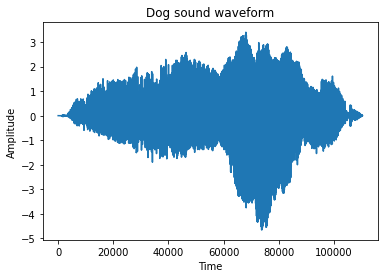

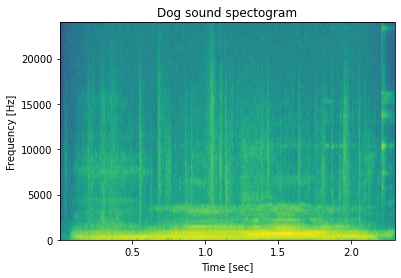

In [126]:
#plot and spectogram with standardization
data = standardize(data)

print('Mean: ',np.mean(data)) 
print('Standard deviation: ', np.std(data))

waveGraph(data)

spectogram(data, samplerate)

In [ ]:
#imports for text manipulation and link mining
from collections import defaultdict
import urllib as url
from bs4 import BeautifulSoup as bs
from collections import Counter


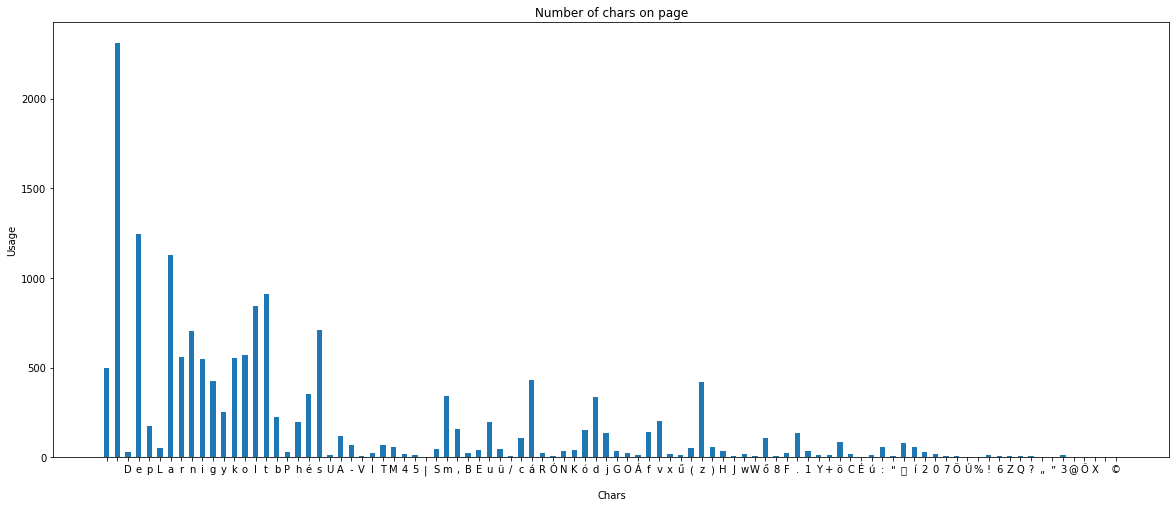

In [143]:
#get the text from url
f = url.request.urlopen("http://smartlab.tmit.bme.hu/oktatas-deep-learning")
content = bs(f.read())
text= content.get_text()

#count the different chars
count= Counter(text)

#visualize the data
plt.subplots(figsize=(20,8))
plt.bar(count.keys(),count.values(), width=0.5)   

plt.ylabel("Usage")
plt.xlabel("Characters")
plt.title("Number of chars on page")
plt.show()

